In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Dataset Loading

In [2]:
total_df = pd.read_csv("../data/train.csv")
total_df.head(3)

,date,store,item,sales
0,2013-01-01,1,1,13
1,2013-01-02,1,1,11
2,2013-01-03,1,1,14


# Preprocessing

In [3]:
total_df["year"] = total_df["date"].apply(lambda x: int(x.split("-")[0]))
total_df["month"] = total_df["date"].apply(lambda x: int(x.split("-")[1]))
total_df["day"] = total_df["date"].apply(lambda x: int(x.split("-")[2]))

In [4]:
store_1 = total_df[total_df["store"] == 1]
store_1_item_1 = store_1[store_1["item"] == 1]

In [5]:
store_1_item_1.head(3)

,date,store,item,sales,year,month,day
0,2013-01-01,1,1,13,2013,1,1
1,2013-01-02,1,1,11,2013,1,2
2,2013-01-03,1,1,14,2013,1,3


# Droppping sales data during the year 2017 - for prediction

In [15]:
store_1_item_1.drop(index=np.where(store_1_item_1["year"] == 2017)[0], inplace=True)

/var/folders/b0/43k3nkrx6vv3qbyw2gh54wd80000gn/T/ipykernel_46696/3981692873.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  store_1_item_1.drop(index=np.where(store_1_item_1["year"] == 2017)[0], inplace=True)


In [16]:
store_1_item_1.tail()

,date,store,item,sales,year,month,day
1456,2016-12-27,1,1,10,2016,12,27
1457,2016-12-28,1,1,16,2016,12,28
1458,2016-12-29,1,1,21,2016,12,29
1459,2016-12-30,1,1,24,2016,12,30
1460,2016-12-31,1,1,14,2016,12,31


# ARIMA Model

In [18]:
from statsmodels.tsa.arima.model import ARIMA
forecast_model = ARIMA(store_1_item_1["sales"], order=(8, 0, 58))
forecast_model_fit = forecast_model.fit()

/Users/ramnaresh/anaconda3/envs/MachineLearning/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [27]:
no_steps = 50
forecast_data = forecast_model_fit.forecast(steps=no_steps)

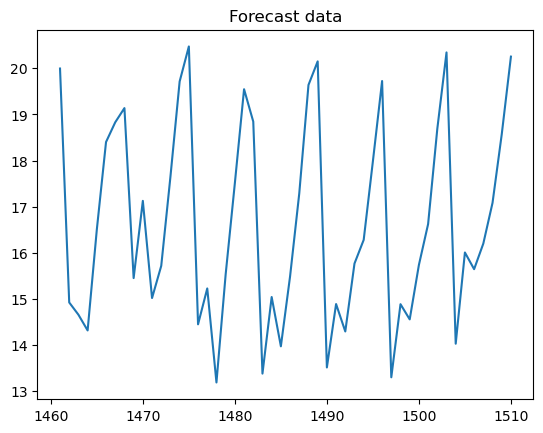

In [31]:
plt.plot(forecast_data)
plt.title("Forecast data")
plt.show()

In [26]:
test = total_df[total_df["store"] == 1]
test = test[test["item"] == 1]
test = test[test["year"] == 2017]

In [34]:
test.head(40)

,date,store,item,sales,year,month,day
1461,2017-01-01,1,1,19,2017,1,1
1462,2017-01-02,1,1,15,2017,1,2
1463,2017-01-03,1,1,10,2017,1,3
1464,2017-01-04,1,1,16,2017,1,4
1465,2017-01-05,1,1,14,2017,1,5
1466,2017-01-06,1,1,24,2017,1,6
1467,2017-01-07,1,1,14,2017,1,7
1468,2017-01-08,1,1,20,2017,1,8
1469,2017-01-09,1,1,18,2017,1,9
1470,2017-01-10,1,1,11,2017,1,10


Text(0.5, 1.0, 'Original data')

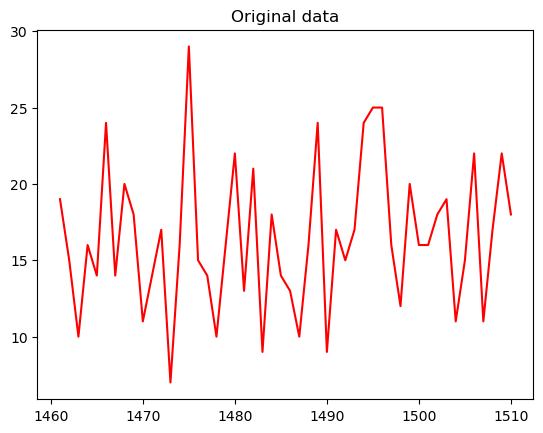

In [33]:
plt.plot(test.iloc[:50, 3], color="red")
plt.title("Original data")

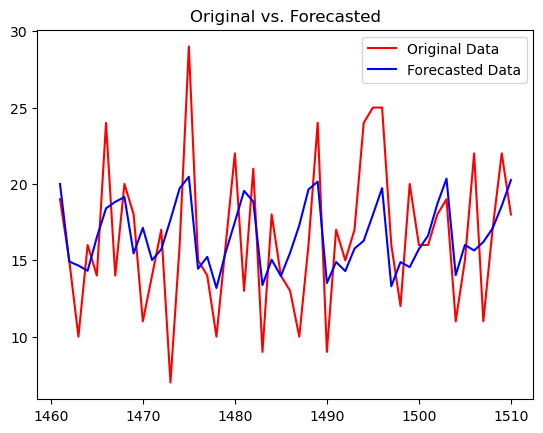

In [35]:
plt.plot(test.iloc[:50, 3], color="red", label="Original Data")
plt.plot(forecast_data, color="blue", label="Forecasted Data")
plt.title("Original vs. Forecasted")
plt.legend()
plt.show()